(ia:ul:pca)=

# PCA



## Esempio: compressione di immagini

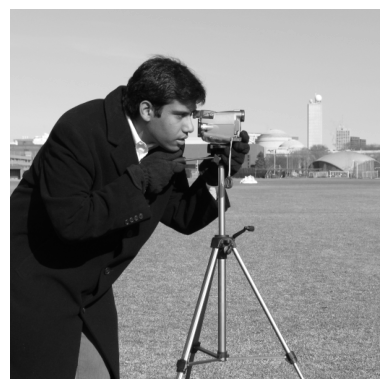

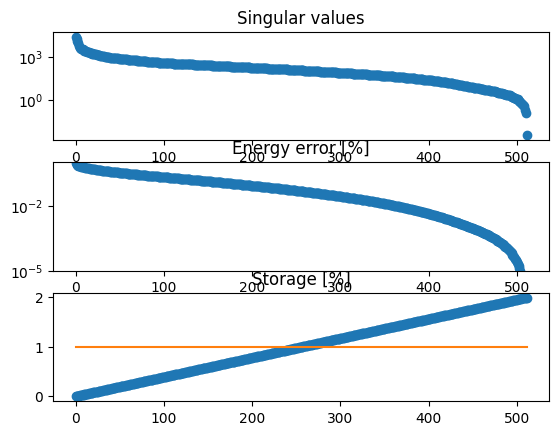

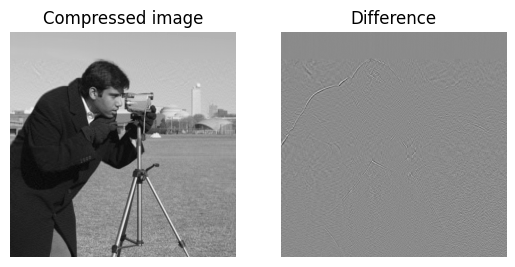

In [65]:
import numpy as np
import scipy as sp

from skimage import data, color
import matplotlib.pyplot as plt

image = data.camera()
#image = data.astronaut()
#image = color.rgb2gray(image)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')

#> Preprocessing
image_avg = np.mean(image)
A = image - image_avg

#> Compute SVD
U, s, Vh = sp.linalg.svd(A, full_matrices=False)

#> Show singular values and energy error
plt.figure()
plt.subplot(3,1,1)
plt.semilogy(s, 'o')
plt.title("Singular values")

energy_error = np.sum(s) - np.cumsum(s)
plt.subplot(3,1,2)
plt.semilogy(energy_error/np.sum(s), 'o')
plt.title("Energy error [%]")
plt.ylim(1e-5,1)

storage = ( np.shape(image)[0] + np.shape(image)[1] ) * np.arange(len(s))
original_data = np.shape(image)[0] * np.shape(image)[1]
plt.subplot(3,1,3)
plt.plot(storage/original_data, 'o', label='compressed image')
plt.plot([0, len(s)-1], [1, 1], label='original_data')
plt.title("Storage [%]")
# plt.ylim(1e-5,1)


#
n_svd = 100
sigmaVh_svd = np.diag(s[0:n_svd]) @  Vh[0:n_svd,:]
A_svd = U[:,0:n_svd] @ sigmaVh_svd + image_avg


plt.figure()
plt.subplot(1,2,1)
plt.imshow(A_svd, cmap='gray')
plt.axis('off')
plt.title("Compressed image")

plt.subplot(1,2,2)
plt.imshow(image-A_svd, cmap='gray')
plt.axis('off')
plt.title("Difference")

plt.show()